In [8]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sigfig

from qPCR_plotting import *
import EmmaPlotColors

# PICK ONE!
normalization_line = 'NF54'
#normalization_line = 'KOP230P'
# normalization_line = 'KOPfs25'

normalization_gene = 'Actin1'

if normalization_line == 'KOP230P':
    df = pd.read_json('qpcr_df_05_KOP230P.json')
elif normalization_line == 'KOPfs25':
    df = pd.read_json('qpcr_df_05_KOPfs25.json')
else:
    df = pd.read_json('qpcr_df_05_NF54.json')

output_folder = get_output_folder(experiment='qPCR_all')
line_normalization_title = f'Expression fold change to {normalization_line} (normalised to {normalization_gene})'

dfq = df.query('gene != @normalization_gene and line != @normalization_line')
dfq = dfq.query('gene != "Pfcyp87"') # remove this gene from the dataframe
print(output_folder)

list(df.columns)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
C:\Users\Emma Jones\OneDrive - University of Cambridge\Documents\My work\cambridge\Year 2\Rayner lab\Data\qPCR\Code output\qPCR_all


['gene',
 'line',
 'mean_relative_concentration',
 'std_relative_concentration',
 'sample',
 'plate',
 'Normalized relative concentration (Actin1)',
 'Expression fold change to NF54 (normalised to Actin1)']

In [9]:
import scipy.stats as stats

sig = []
for (line, gene), dfg in dfq.groupby(['line', 'gene']):
    datapoints = dfg[line_normalization_title]

    t_stat, p_value = stats.ttest_1samp(datapoints, popmean=1)
    sig.append((line, gene, t_stat, p_value, np.mean(datapoints), np.std(datapoints)))

df_sig = pd.DataFrame(sig, columns=['line', 'gene', 't_stat', 'p_value', 'mean', 'std'])
df_sig['significant'] = df_sig['p_value'] < 0.05

df_sig.query('significant == True')

,line,gene,t_stat,p_value,mean,std,significant
1,KOEBA140,EBA140,-100.133934,2.195690e-06,0.039130,0.016621,True
7,KOEBA140,RH2b,-4.530054,2.012682e-02,0.696662,0.115980,True
14,KOEBA175,EBA175,-474.470177,2.064605e-08,0.011471,0.003609,True
17,KOEBA175,RH2a,-4.640374,1.886178e-02,0.676671,0.120685,True
26,KOEBA181,EBA181,-459.911094,2.266949e-08,0.014246,0.003712,True
45,KOPfs25,EBA140,3.302395,4.565143e-02,4.067153,1.608671,True
48,KOPfs25,EBA181,-30.618248,7.653578e-05,0.083997,0.051818,True
55,KORH1,AMA1,-8.323382,3.634560e-03,0.549901,0.093663,True
57,KORH1,EBA165,-9.451541,2.510339e-03,0.601604,0.073008,True
59,KORH1,EBA181,-9.789176,2.265443e-03,0.726248,0.048436,True


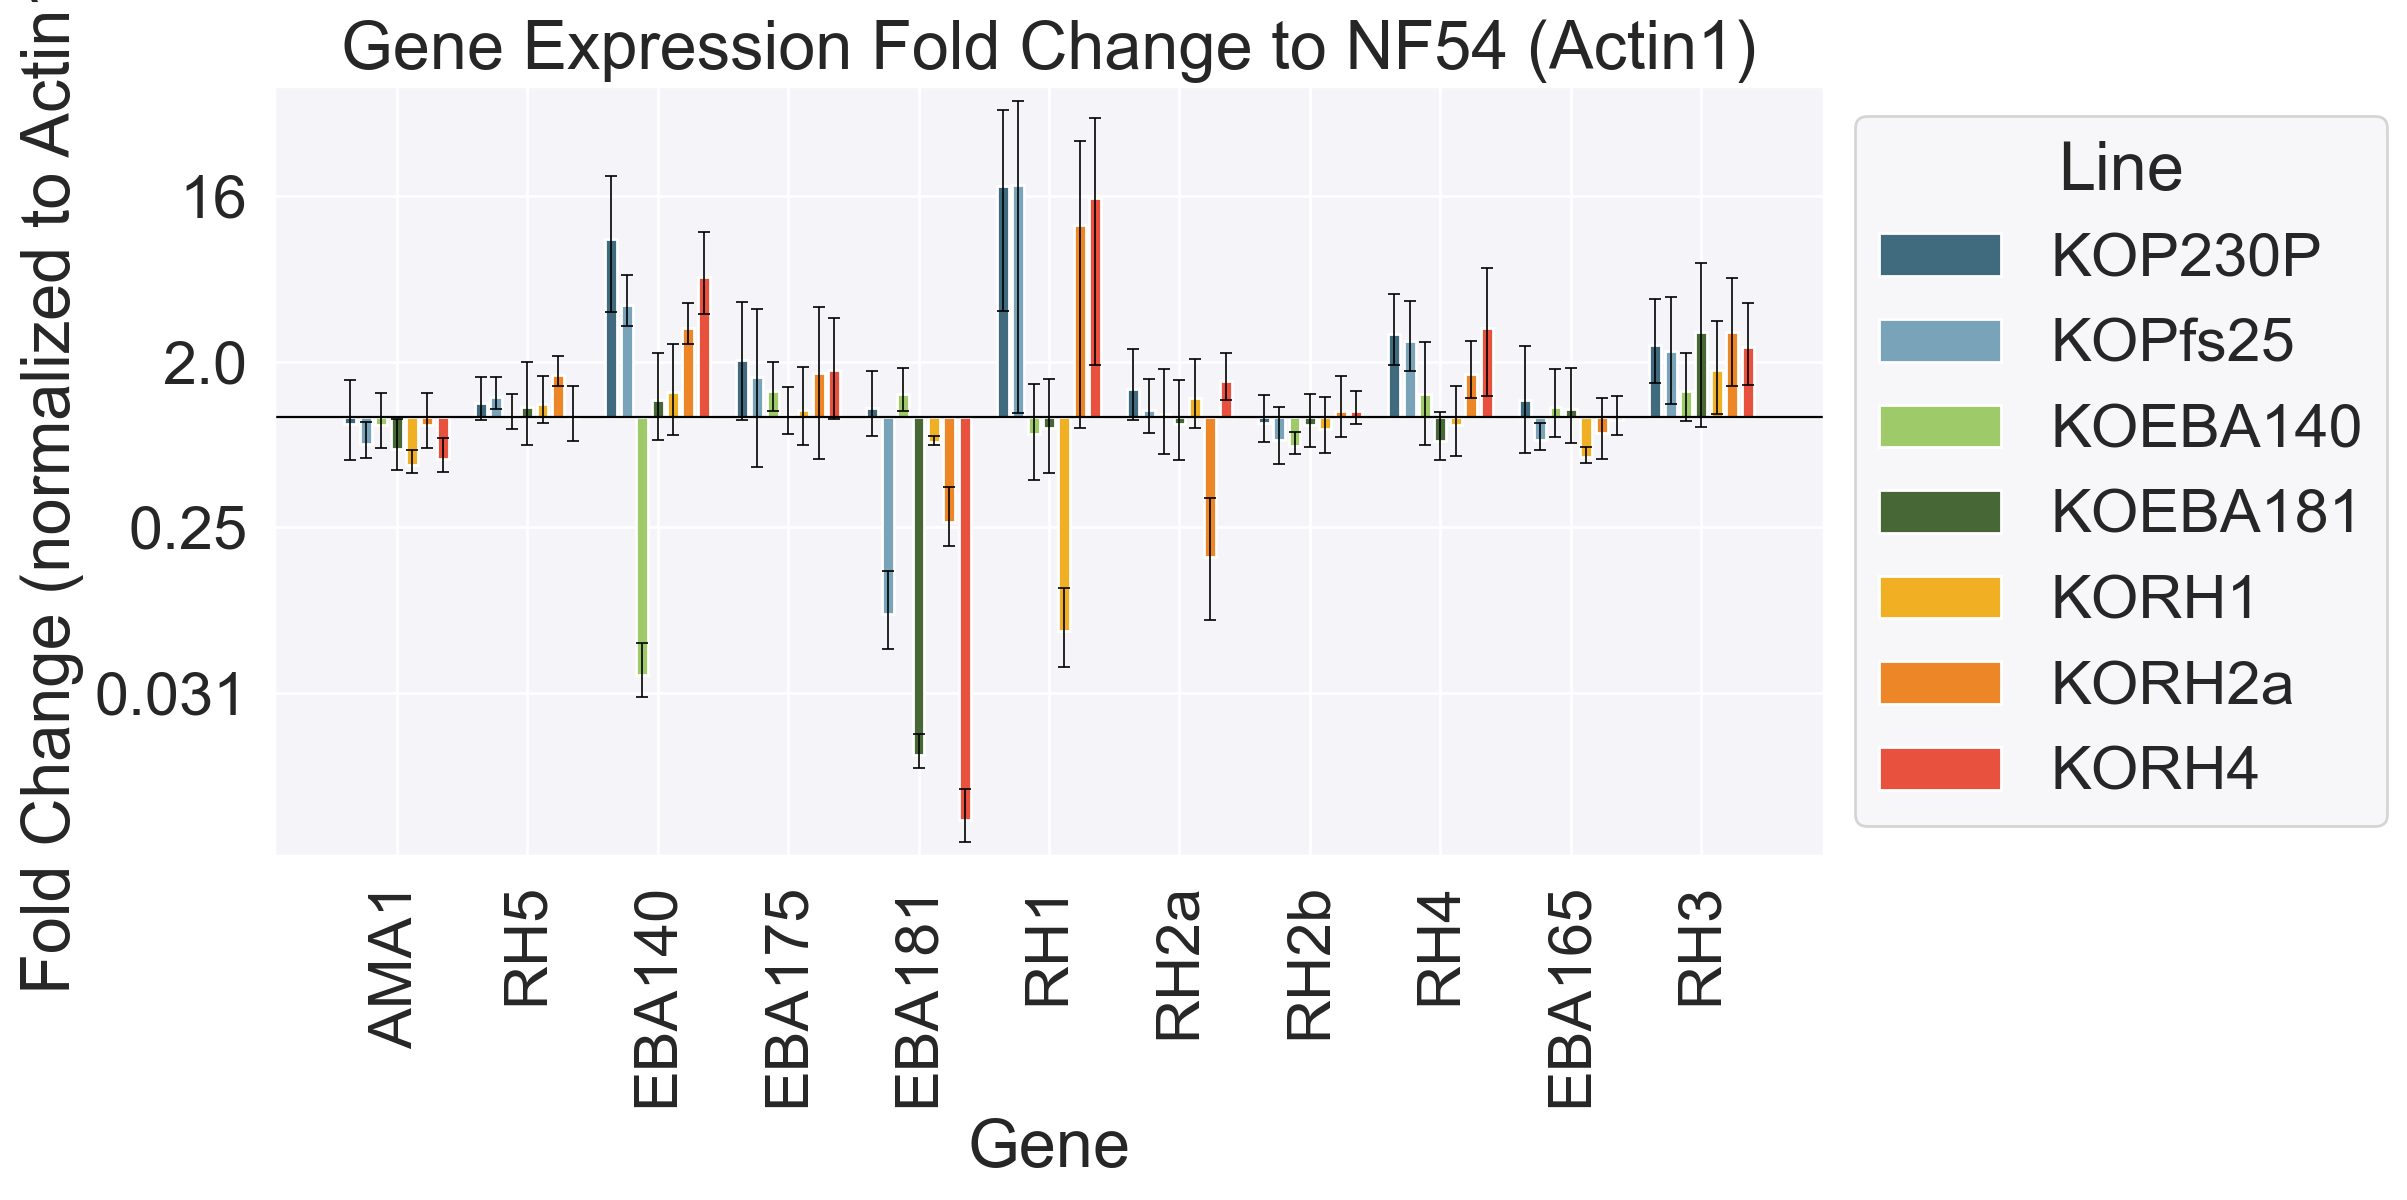

In [10]:
log_barplot(
    #df=dfq,
    df=dfq.query('line != "KOEBA175"'),
    x_key='gene',
    y_key=line_normalization_title,
    hue_key='line',
    x_order=EmmaPlotColors.gene_order,
    hue_order=EmmaPlotColors.line_order,
    colors=colors_dark,
    title=f"Gene Expression Fold Change to {normalization_line} ({normalization_gene})",
    ylabel=f"Fold Change (normalized to {normalization_gene})",
    output_folder=output_folder,
    figsize=(10,5),
)

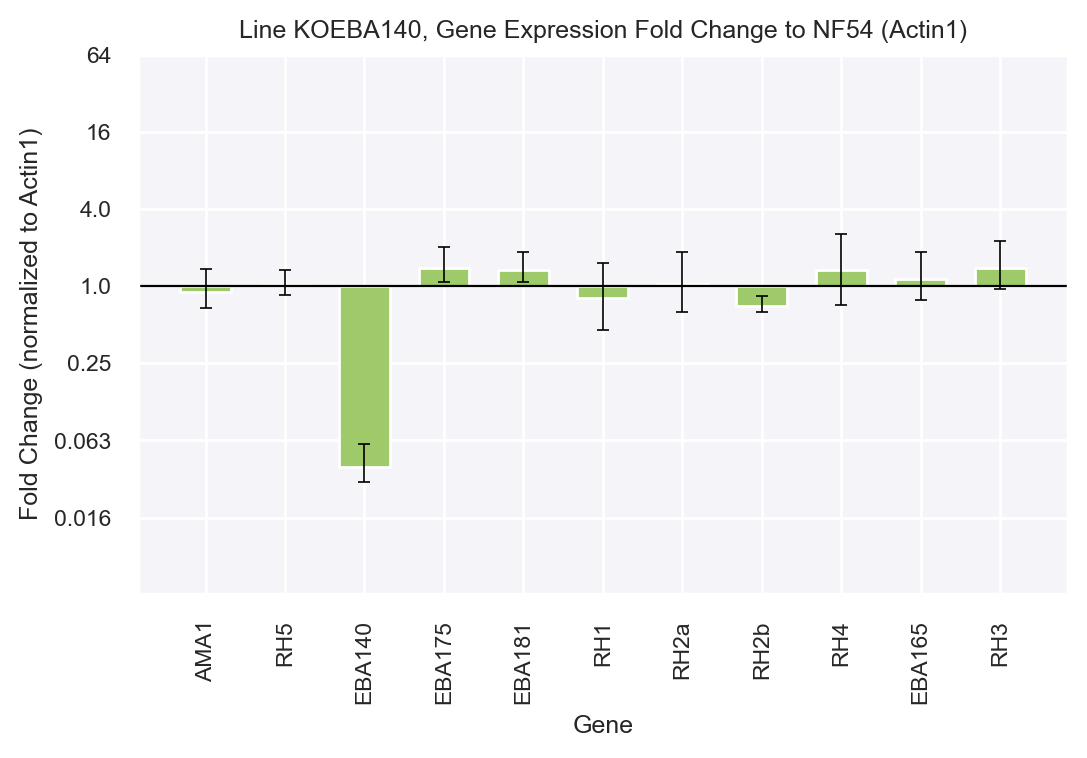

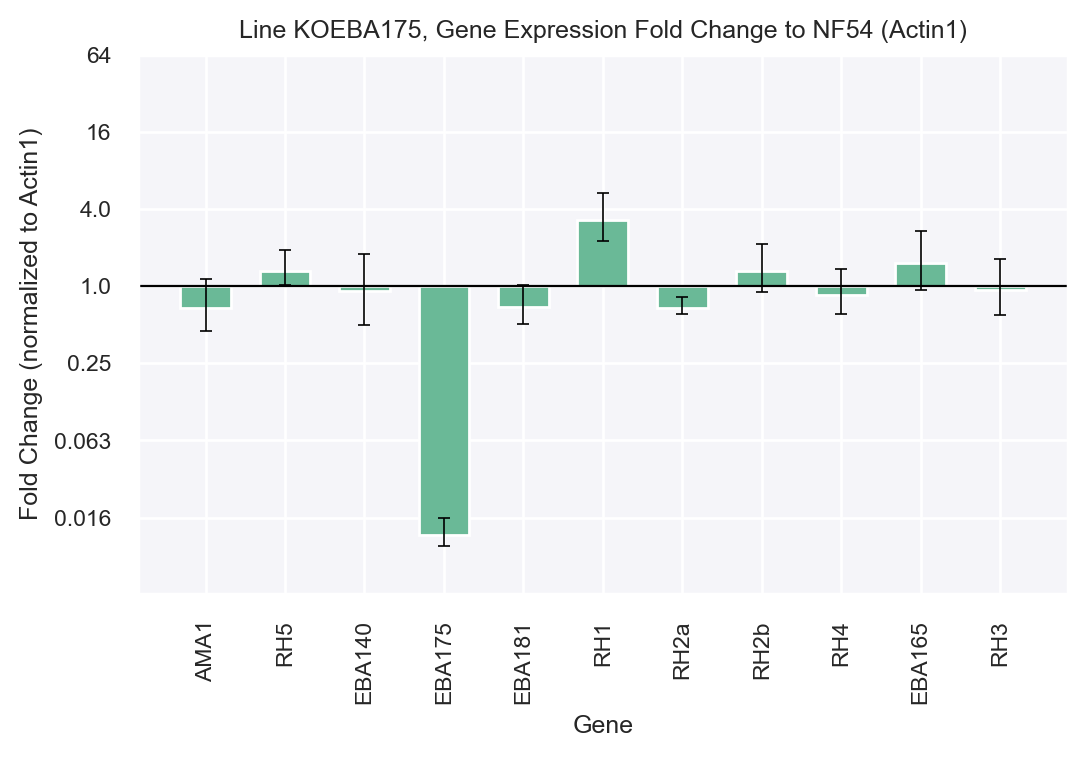

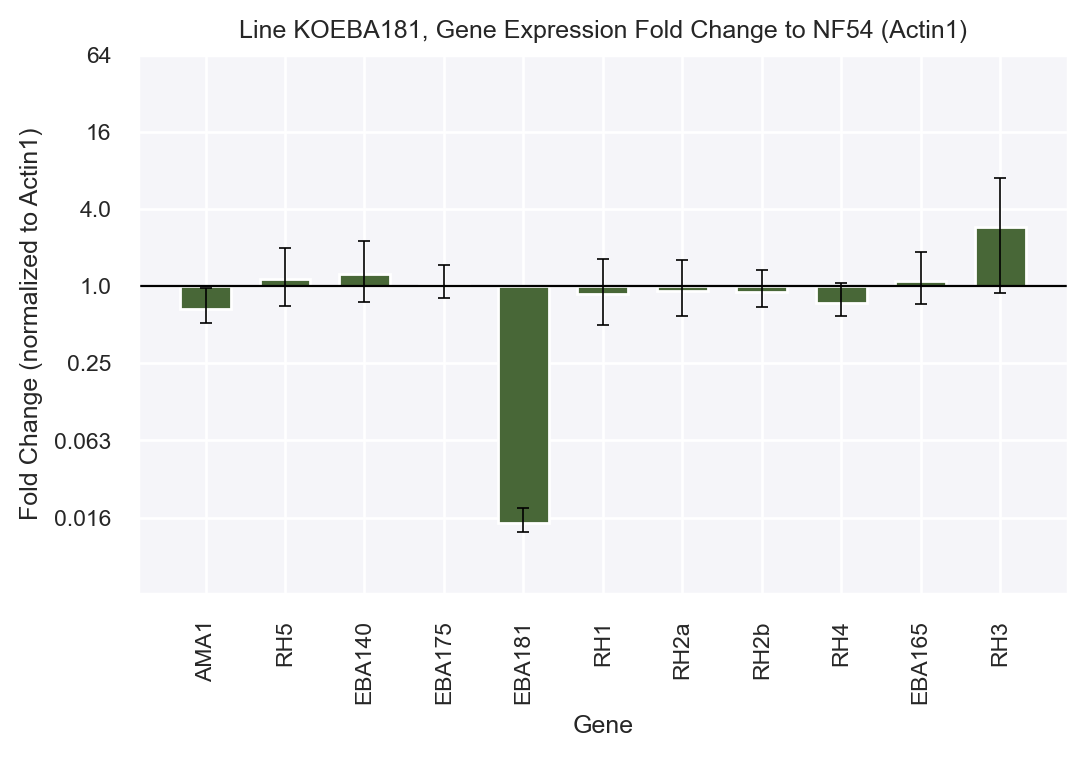

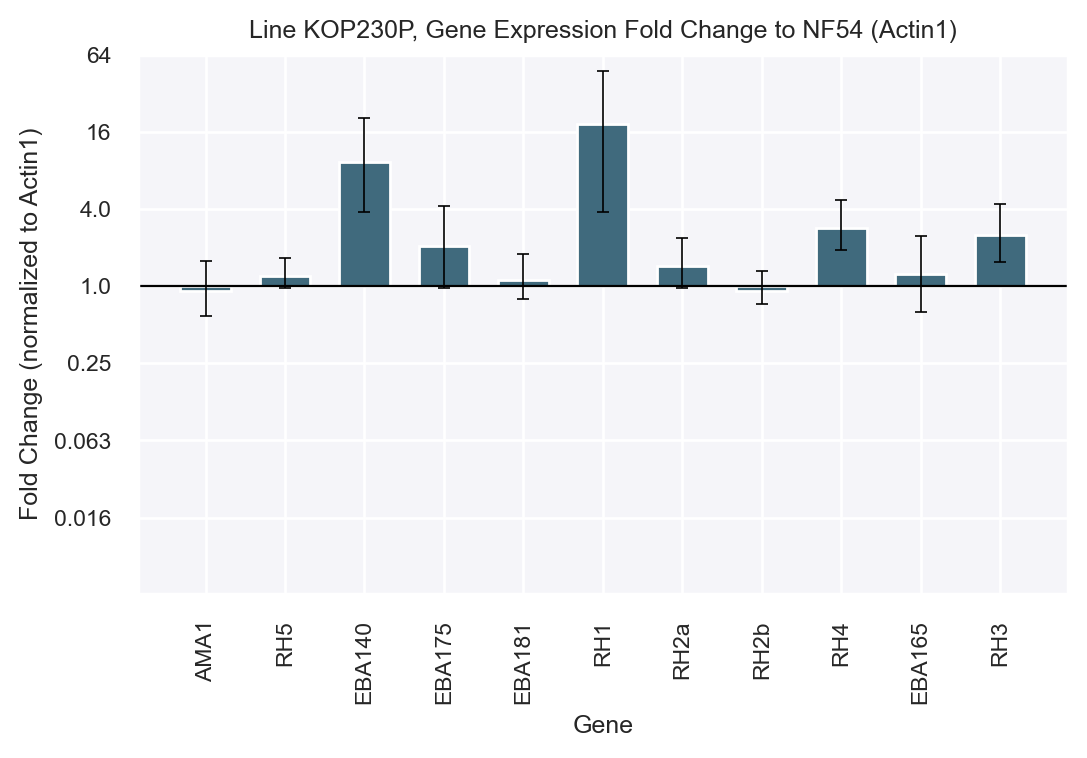

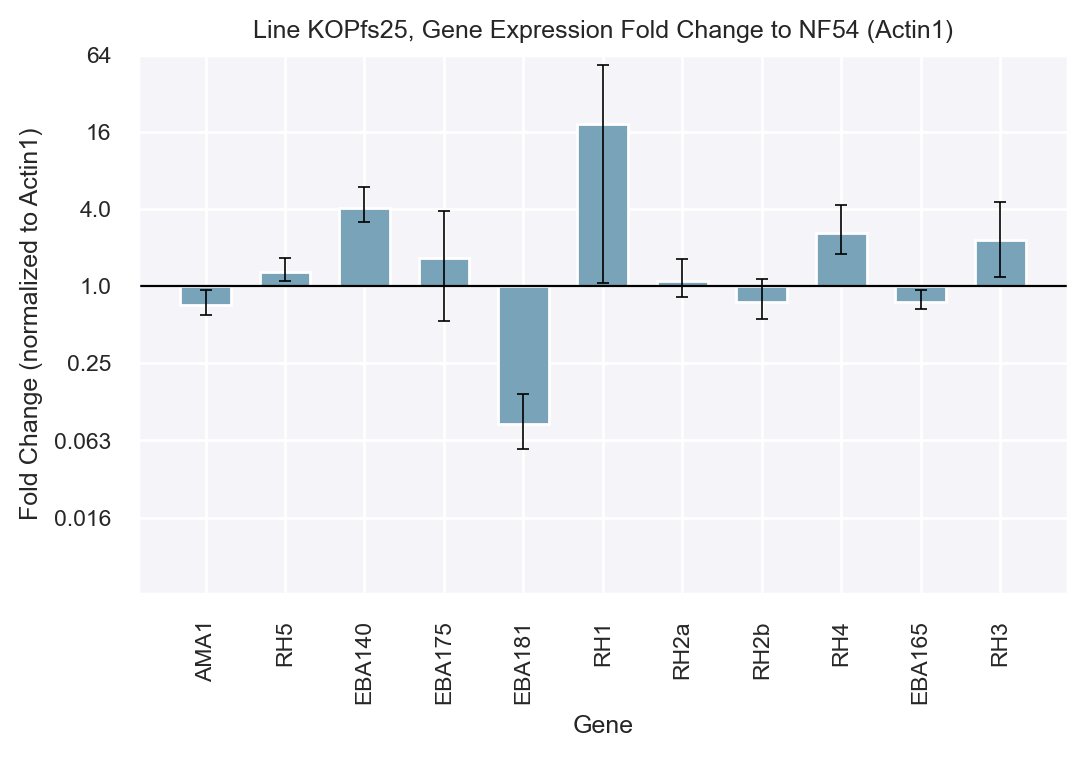

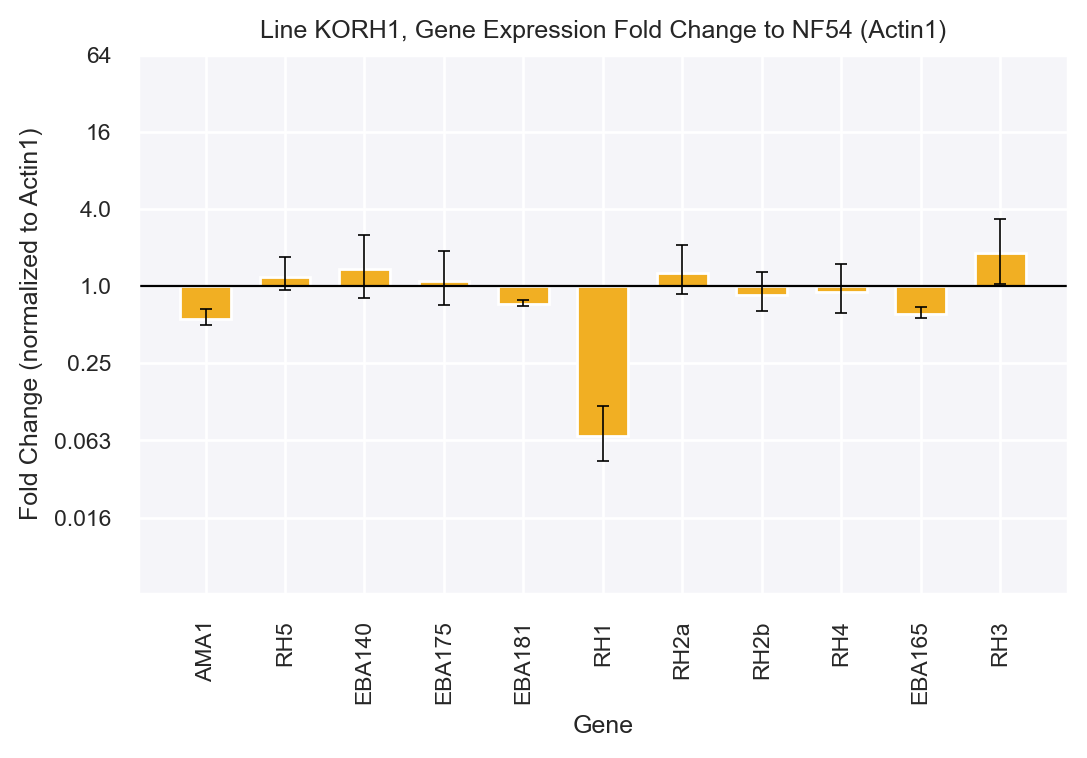

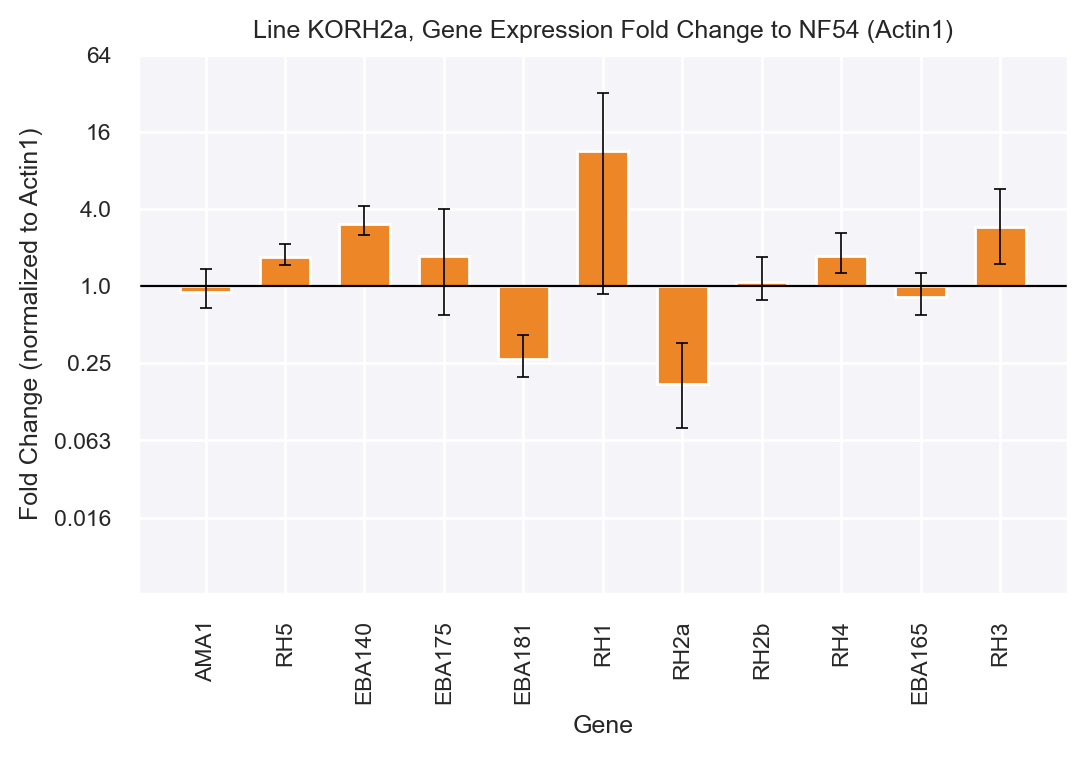

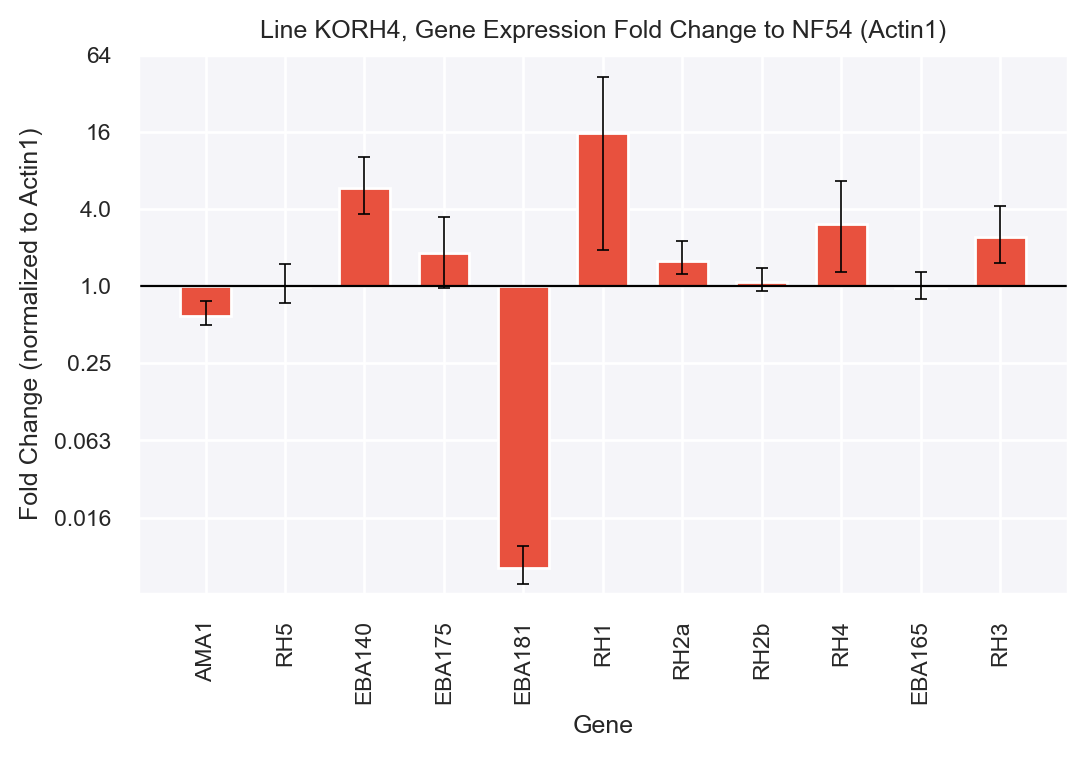

In [11]:

# plot each line
list(df.columns)
for line, dfg in dfq.groupby('line'):
    log_barplot(
        df=dfg,
        x_key='gene',
        y_key=line_normalization_title,
        hue_key='line',
        x_order=EmmaPlotColors.gene_order,
        hue_order=EmmaPlotColors.line_order,
        colors=colors_dark,
        title=f"Line {line}, Gene Expression Fold Change to {normalization_line} ({normalization_gene})",
        ylabel=f"Fold Change (normalized to {normalization_gene})",
        output_folder=output_folder,
        figsize=(6,3.5),
        font_scale=0.75,
    )

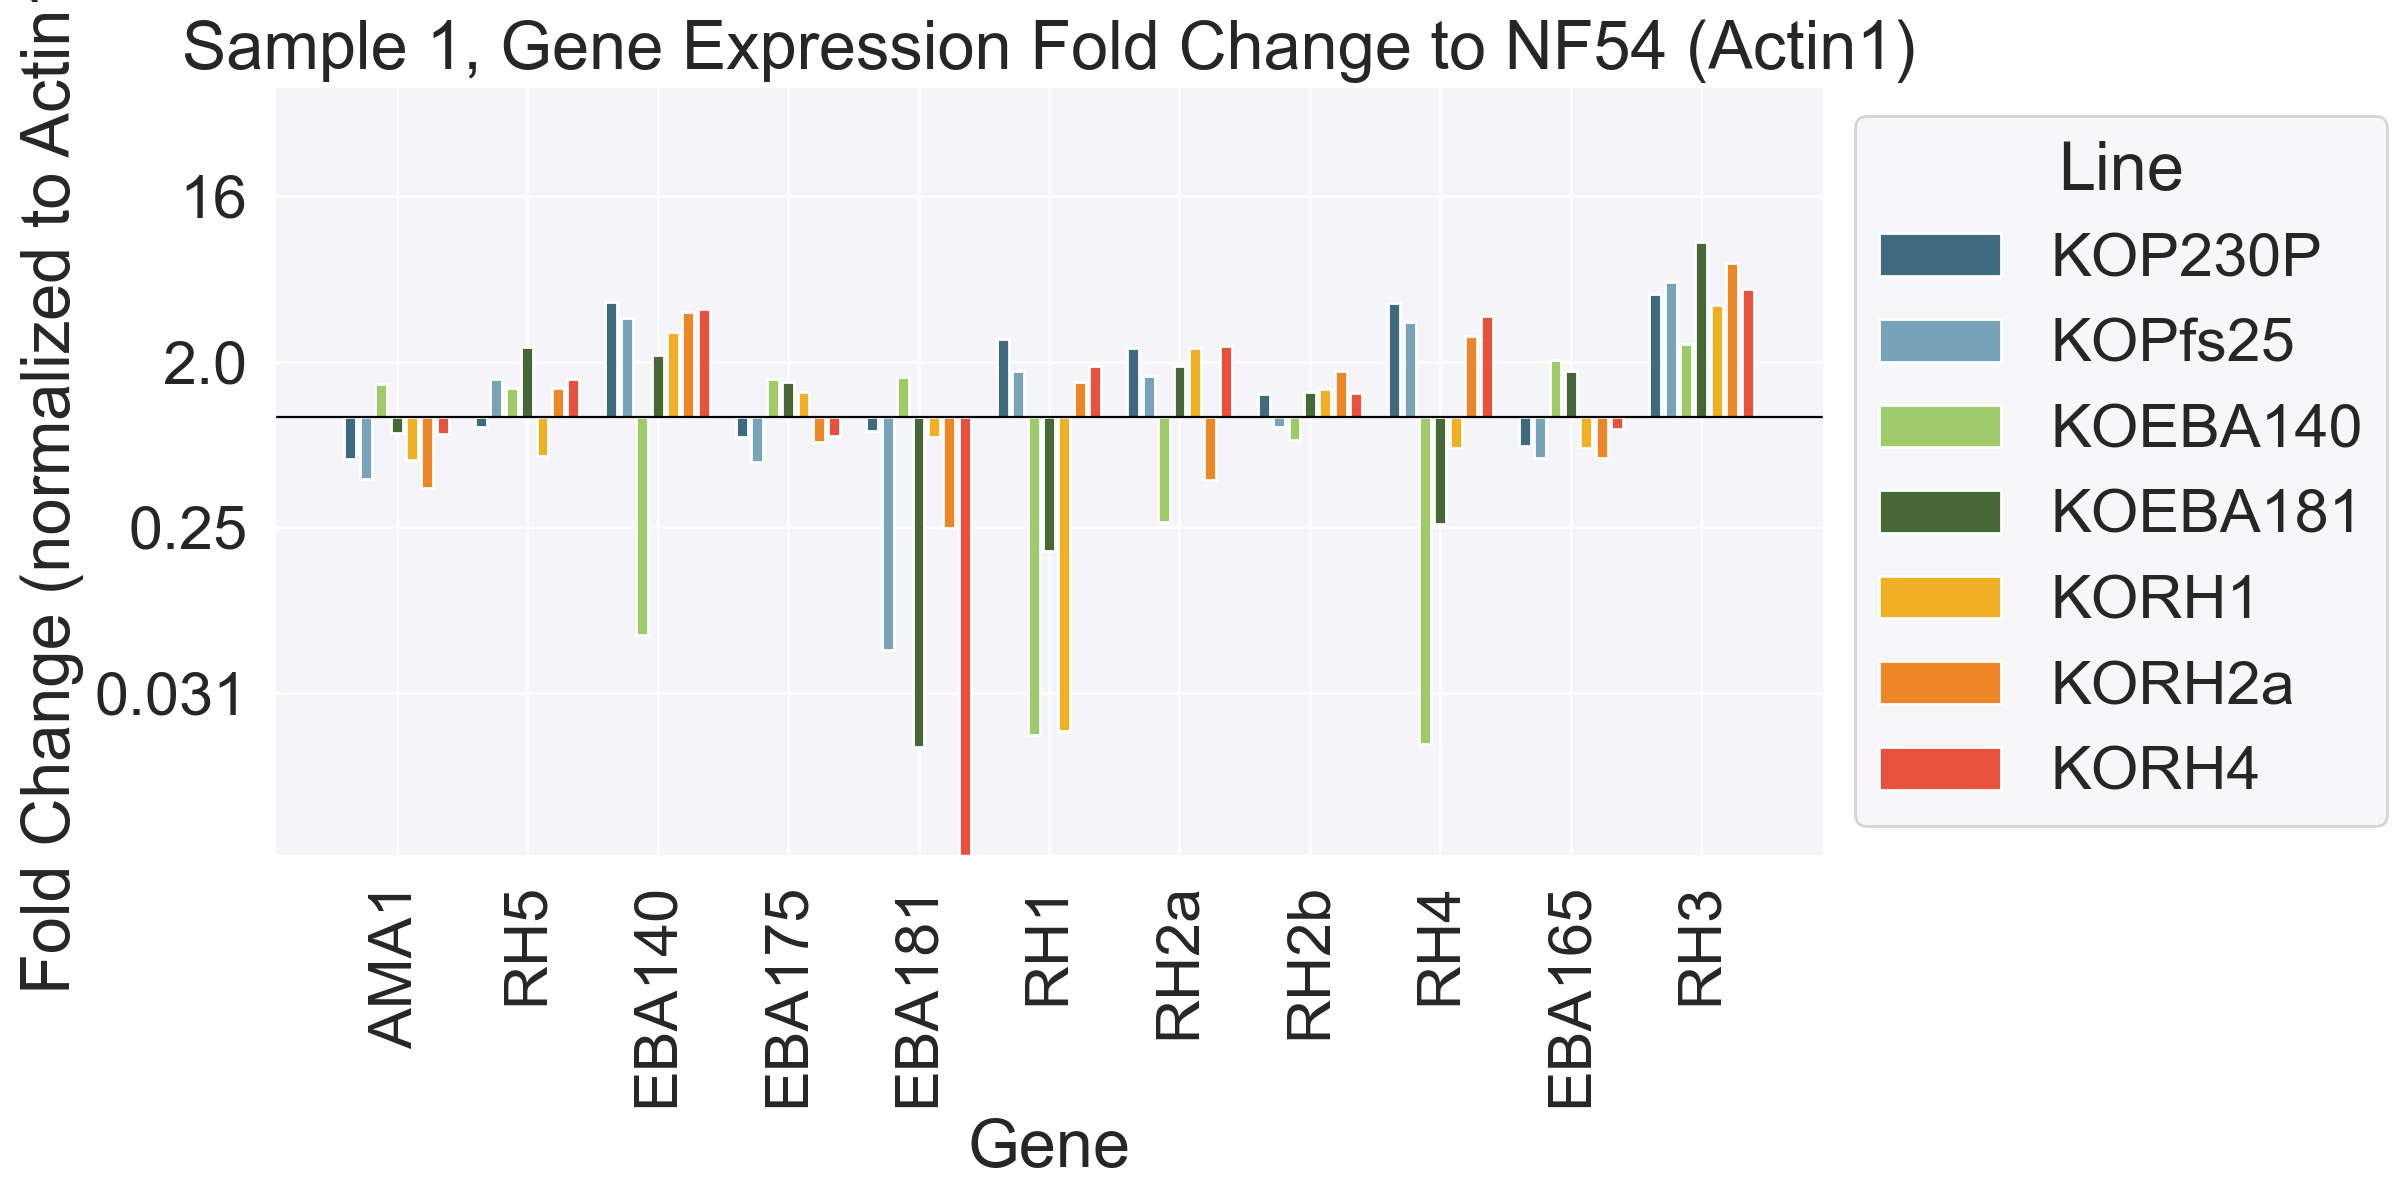

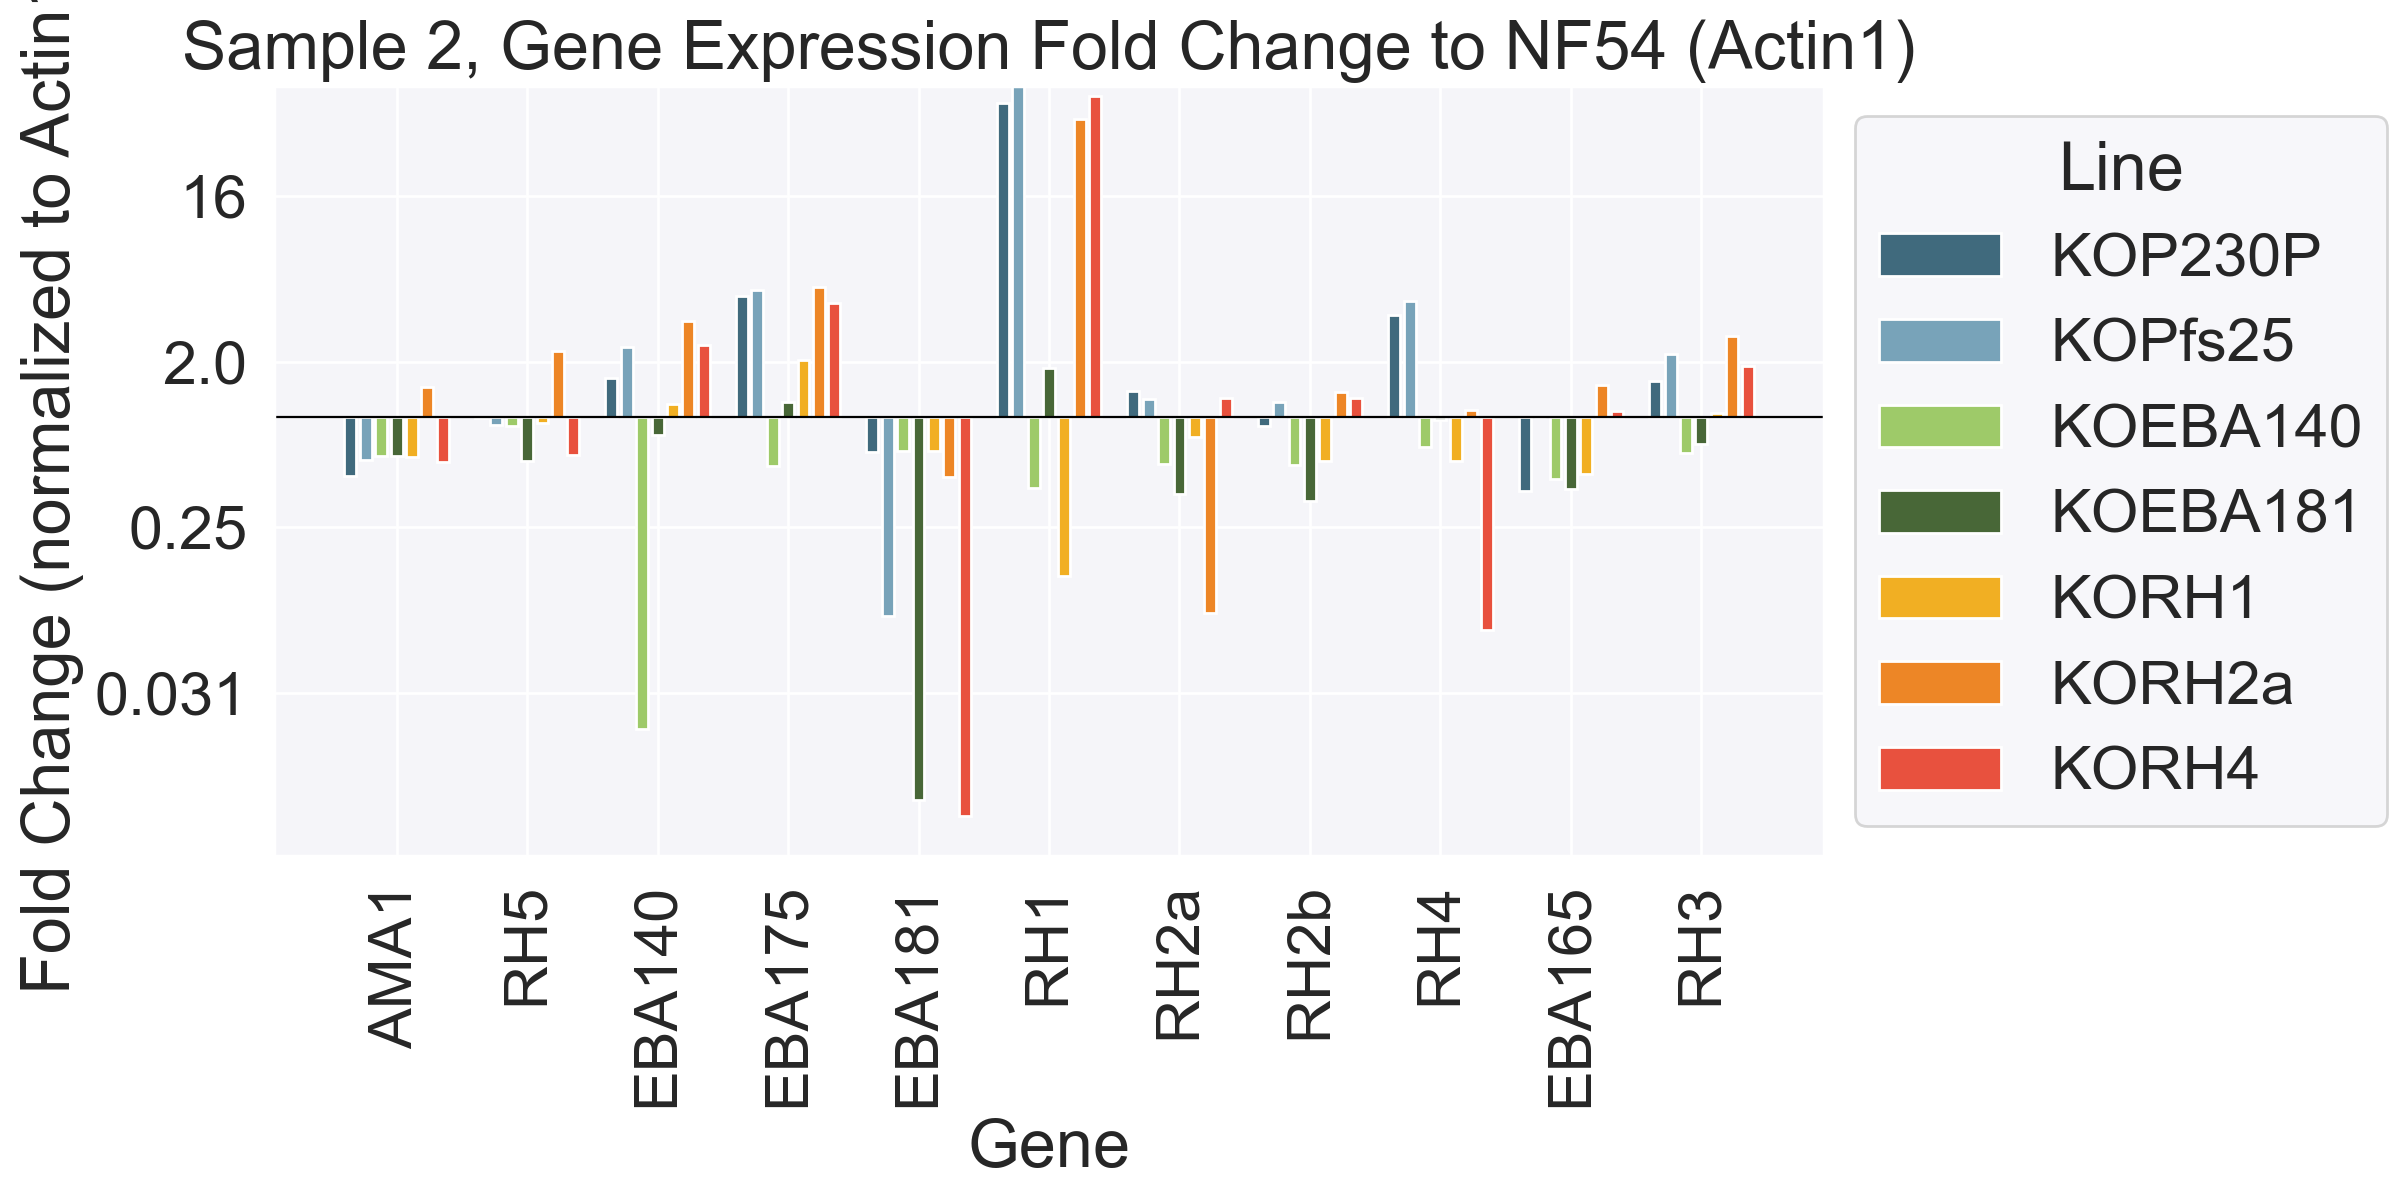

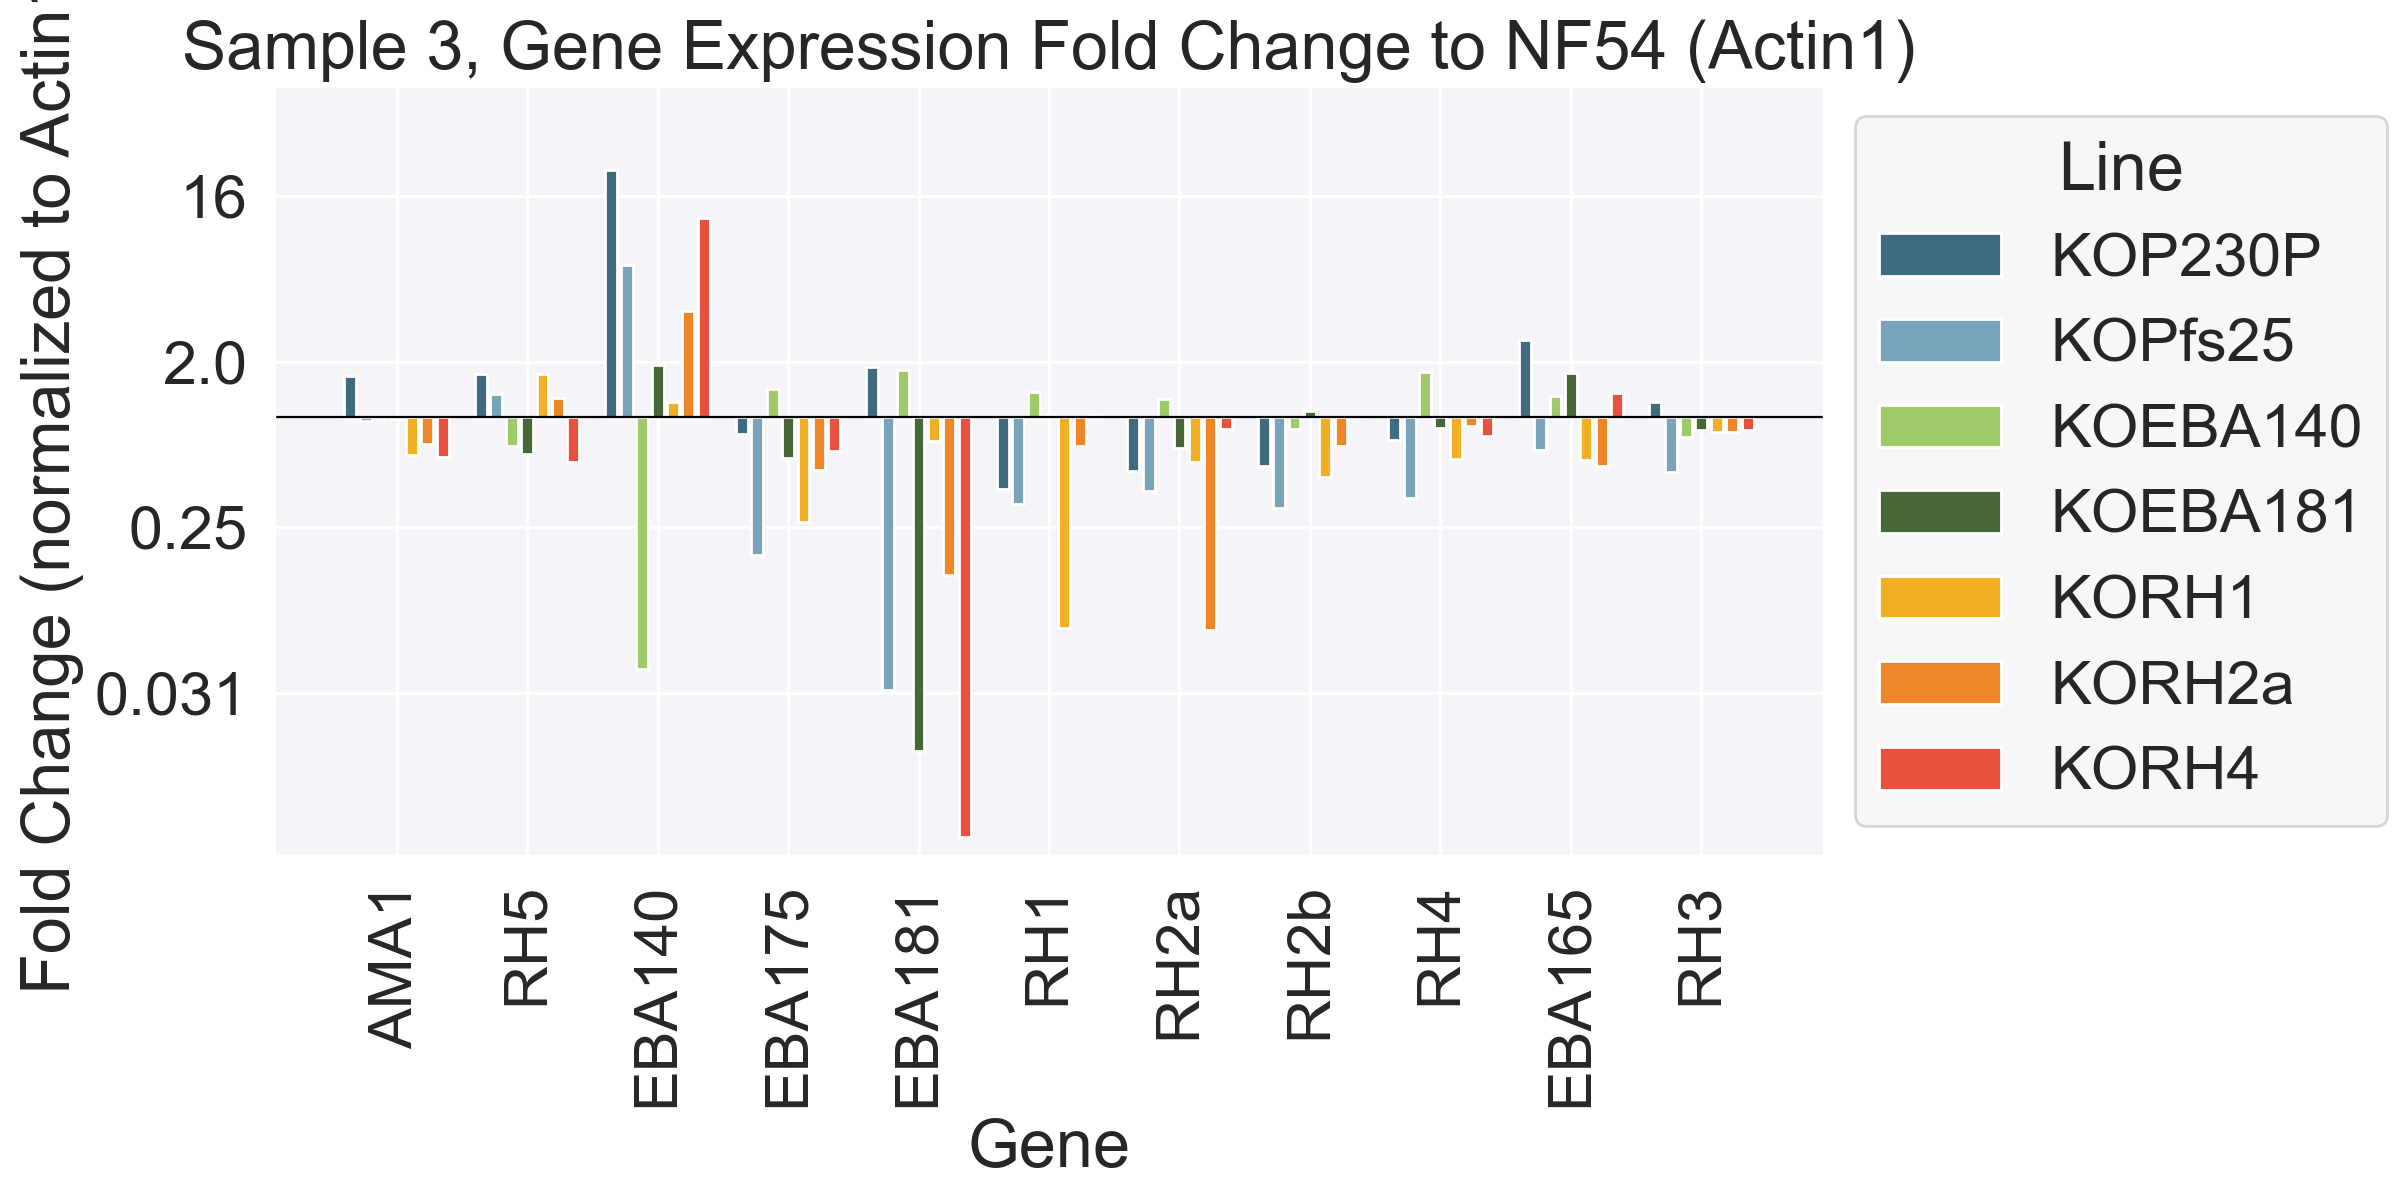

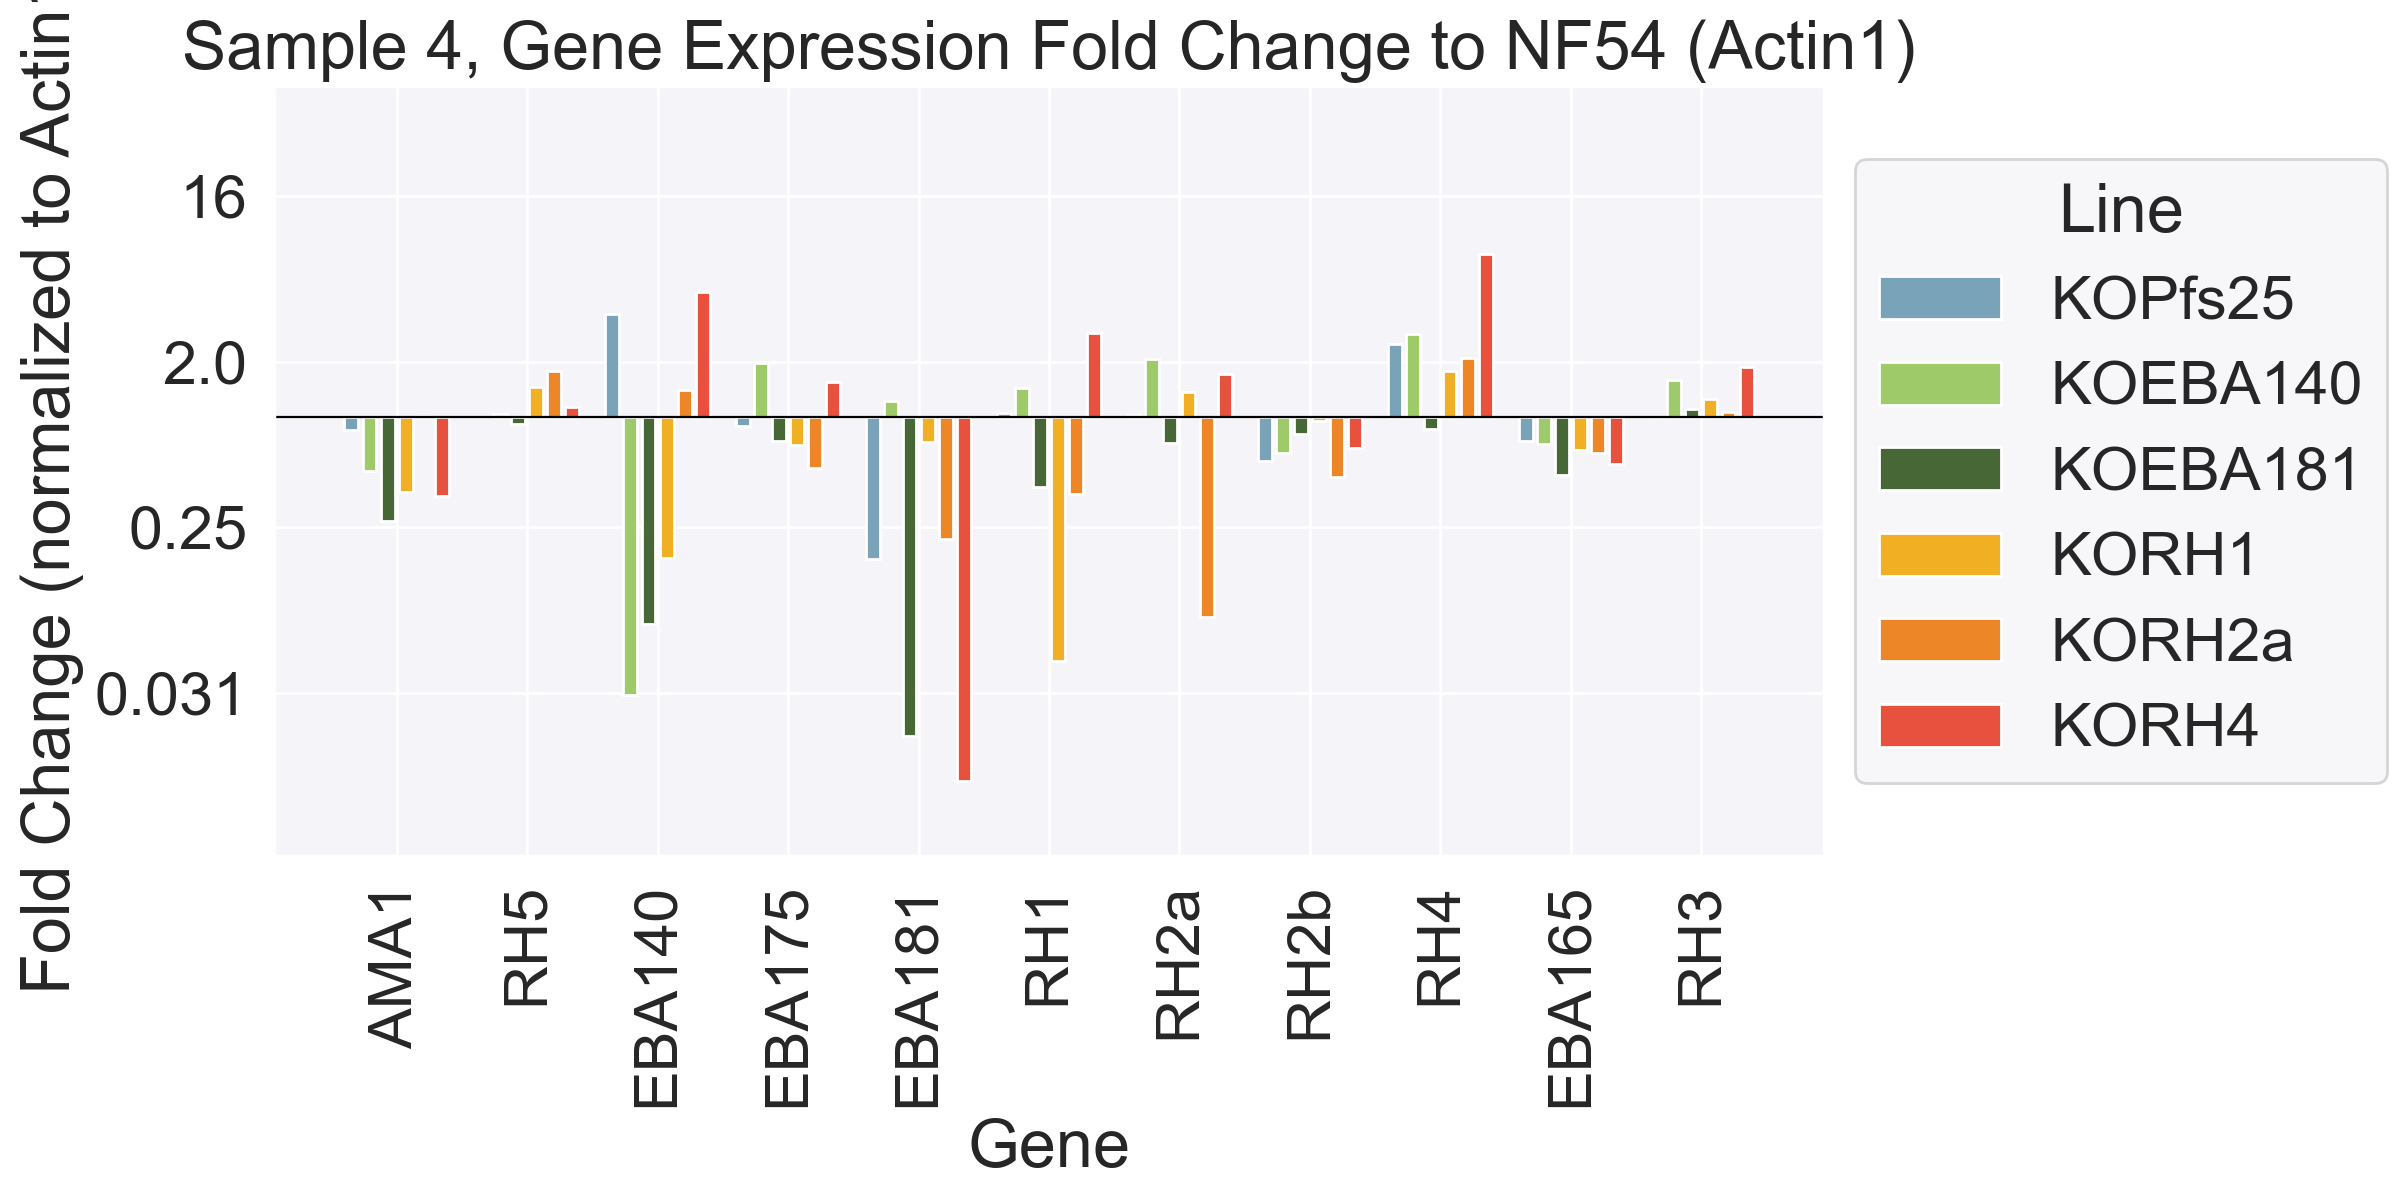

In [12]:
# plot each repeat
for sample, dfg in dfq.groupby('sample'):
    log_barplot(
        df=dfg.query('line != "KOEBA175"'),
        x_key='gene',
        y_key=line_normalization_title,
        hue_key='line',
        x_order=EmmaPlotColors.gene_order,
        hue_order=EmmaPlotColors.line_order,
        colors=colors_dark,
        title=f"Sample {sample}, Gene Expression Fold Change to {normalization_line} ({normalization_gene})",
        ylabel=f"Fold Change (normalized to {normalization_gene})",
        output_folder=output_folder,
        figsize=(10,5),
    )
